# Principal Component Analysis (PCA) on Housing Data

This notebook demonstrates how to perform Principal Component Analysis on housing data. PCA is a dimensionality reduction technique that helps visualize high-dimensional data and can be used to identify patterns and relationships between variables.

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import plotly.express as px
import plotly.graph_objects as go

# Set plot styles
plt.style.use('seaborn-v0_8-whitegrid') 
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

In [7]:
# Load the data
df = pd.read_csv('data_train.csv')

# Display first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (24807, 10)


,Area,Floors,Bedrooms,Bathrooms,Furniture state,Price,avg_price,Legal_status_NAN,Legal_status_have_certificate,Legal_status_sales_contract
0,54.0,2.0,2.0,3.0,1.0,5.35,0.113096,0,1,0
1,92.0,2.0,4.0,4.0,1.0,6.90,0.107876,0,1,0
2,74.0,5.0,4.0,5.0,0.0,9.90,0.065928,0,1,0
3,48.0,5.0,6.0,3.0,0.5,5.70,0.118496,1,0,0
4,80.0,5.0,6.0,6.0,0.0,10.00,0.118496,0,1,0


In [8]:
# Display data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24807 entries, 0 to 24806
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           24807 non-null  float64
 1   Floors                         24807 non-null  float64
 2   Bedrooms                       24807 non-null  float64
 3   Bathrooms                      24807 non-null  float64
 4   Furniture state                24807 non-null  float64
 5   Price                          24807 non-null  float64
 6   avg_price                      24807 non-null  float64
 7   Legal_status_NAN               24807 non-null  int64  
 8   Legal_status_have_certificate  24807 non-null  int64  
 9   Legal_status_sales_contract    24807 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 1.9 MB


In [9]:
# Summary statistics
df.describe()

,Area,Floors,Bedrooms,Bathrooms,Furniture state,Price,avg_price,Legal_status_NAN,Legal_status_have_certificate,Legal_status_sales_contract
count,24807.000000,24807.000000,24807.000000,24807.000000,24807.000000,24807.000000,24807.000000,24807.000000,24807.000000,24807.000000
mean,66.400176,3.372563,3.507276,3.328698,0.499899,5.767793,0.107887,0.109445,0.863869,0.026686
std,45.554692,1.282511,1.309428,1.380252,0.446020,2.196040,0.046415,0.312203,0.342934,0.161167
min,3.100000,1.000000,1.000000,1.000000,0.000000,1.000000,0.002109,0.000000,0.000000,0.000000
25%,40.000000,2.000000,3.000000,2.000000,0.000000,4.080000,0.073398,0.000000,1.000000,0.000000
50%,55.000000,3.407444,3.000000,3.000000,0.500000,5.800000,0.106686,0.000000,1.000000,0.000000
75%,80.000000,4.000000,4.000000,4.000000,1.000000,7.500000,0.147291,0.000000,1.000000,0.000000
max,595.000000,9.000000,9.000000,9.000000,1.000000,11.500000,0.400000,1.000000,1.000000,1.000000


## Data Preprocessing

Before applying PCA, we need to prepare the data:
1. Check for missing values
2. Select relevant features
3. Standardize the data (PCA is sensitive to the scale of the features)

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
missing_values[missing_values > 0]

Missing values in each column:


Series([], dtype: int64)

In [11]:
# Select relevant features for PCA
# For housing data, we'll focus on numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable if it exists (assuming 'Price' is the target)
if 'Price' in numerical_features:
    numerical_features.remove('Price')

# Print selected features
print(f"Selected features for PCA: {numerical_features}")

# Prepare data for PCA
X = df[numerical_features]

# Handle any remaining missing values (if any)
X = X.fillna(X.mean())

print(f"Data shape for PCA: {X.shape}")

Selected features for PCA: ['Area', 'Floors', 'Bedrooms', 'Bathrooms', 'Furniture state', 'avg_price', 'Legal_status_NAN', 'Legal_status_have_certificate', 'Legal_status_sales_contract']
Data shape for PCA: (24807, 9)


## Performing PCA

Now we'll standardize the data and perform PCA analysis:

In [12]:
# Create a pipeline with standardization and PCA
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

# Apply the pipeline to the data
X_pca = pca_pipeline.fit_transform(X)

# Get the PCA model from the pipeline
pca = pca_pipeline.named_steps['pca']

# Display explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained variance ratio by component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} cumulative)")

Explained variance ratio by component:
PC1: 0.2932 (0.2932 cumulative)
PC2: 0.2289 (0.5220 cumulative)
PC3: 0.1598 (0.6818 cumulative)
PC4: 0.1104 (0.7923 cumulative)
PC5: 0.0902 (0.8824 cumulative)
PC6: 0.0497 (0.9322 cumulative)
PC7: 0.0410 (0.9732 cumulative)
PC8: 0.0268 (1.0000 cumulative)
PC9: 0.0000 (1.0000 cumulative)


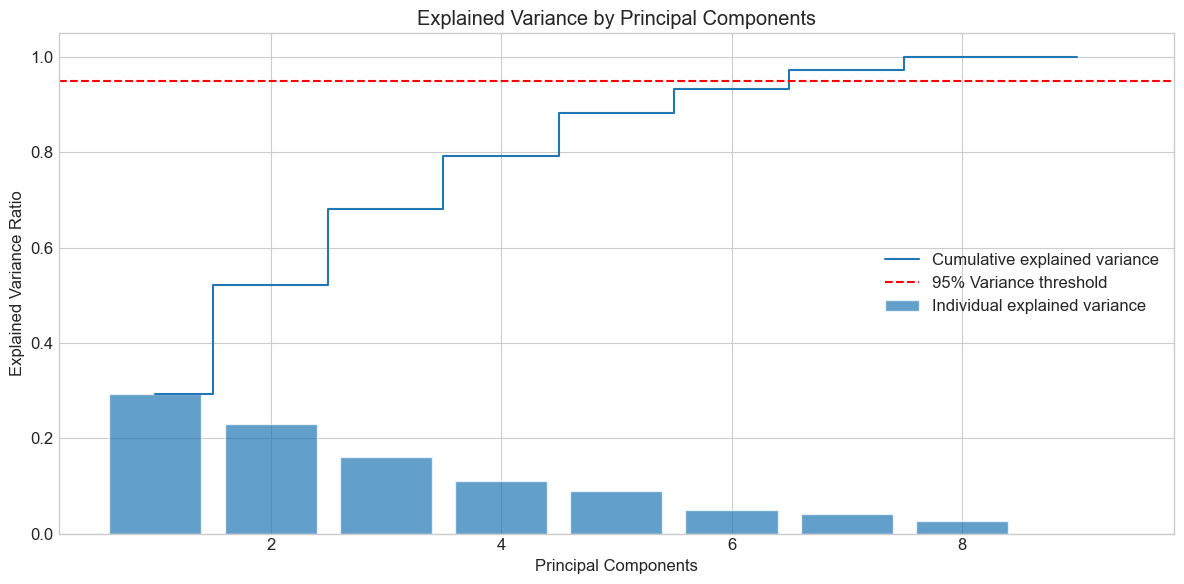

Number of components needed to explain 95% variance: 7


In [13]:
# Plot explained variance
plt.figure(figsize=(12, 6))

# Individual explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual explained variance')

# Cumulative explained variance
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')

# Add threshold line at 0.95 cumulative variance
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance threshold')

# Customize plot
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Determine number of components needed to explain 95% variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Number of components needed to explain 95% variance: {n_components_95}")

## PCA Visualization

Now let's visualize the PCA results with several plots:

In [14]:
# Create DataFrame with first two principal components
pca_df = pd.DataFrame(
    data=X_pca[:, :2],
    columns=['PC1', 'PC2']
)

# Add any categorical variable for coloring if available
if 'Furniture state' in df.columns:
    pca_df['Furniture_state'] = df['Furniture state']
    color_col = 'Furniture_state'
else:
    color_col = None

# Create scatter plot of first two PCs
fig = px.scatter(
    pca_df, x='PC1', y='PC2',
    color=color_col if color_col else None,
    opacity=0.7,
    title='PCA: First Two Principal Components',
    labels={'PC1': f'PC1 ({explained_variance[0]:.2%} var)', 'PC2': f'PC2 ({explained_variance[1]:.2%} var)'},
    width=900, height=700
)

fig.update_layout(
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()

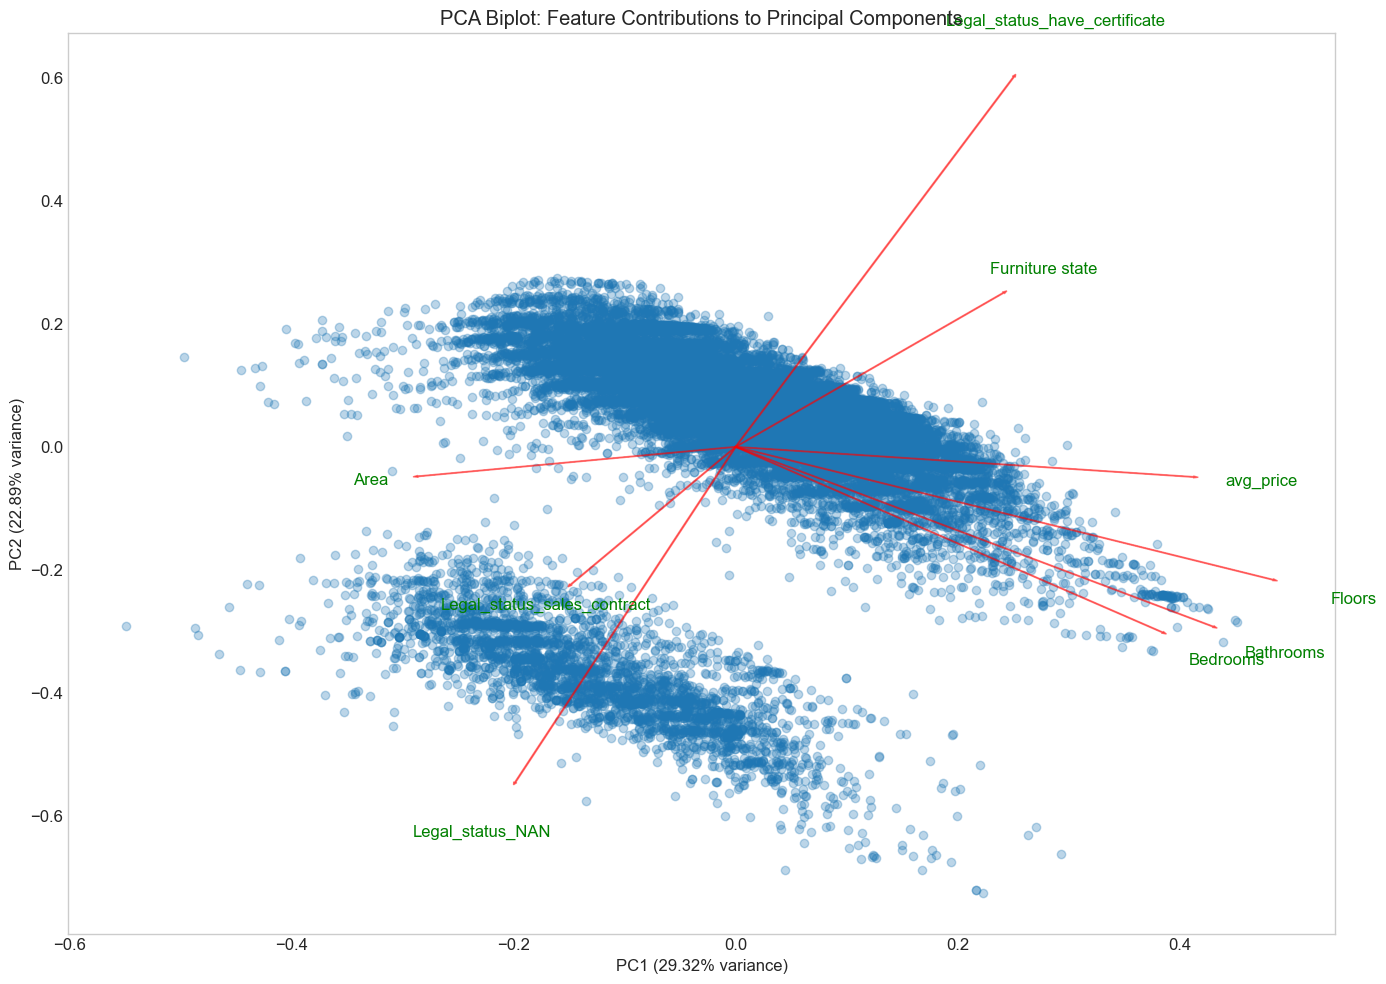

In [15]:
# Create biplot to show feature contributions to principal components
def biplot(score, coef, features):
    # Create new figure
    plt.figure(figsize=(14, 10))
    
    # Plot samples (dots)
    xs = score[:, 0]
    ys = score[:, 1]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, alpha=0.3)
    
    # Plot feature vectors (arrows)
    n = coef.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coef[i, 0], coef[i, 1], color='r', alpha=0.5)
        plt.text(coef[i, 0] * 1.15, coef[i, 1] * 1.15, features[i], color='g', ha='center', va='center')
    
    # Add labels and title
    plt.xlabel(f"PC1 ({explained_variance[0]:.2%} variance)")
    plt.ylabel(f"PC2 ({explained_variance[1]:.2%} variance)")
    plt.title("PCA Biplot: Feature Contributions to Principal Components")
    plt.grid()
    
    return plt

# Get the PCA components and transform the data
X_std = pca_pipeline.named_steps['scaler'].transform(X)
PC = pca.components_

# Create biplot
biplot(X_pca[:, :2], PC[:2].T, numerical_features)
plt.tight_layout()
plt.show()

## Feature Importance Analysis

Let's analyze which features contribute most to each principal component:

In [16]:
# Create DataFrame of loadings/component weights
loadings = pd.DataFrame(
    data=pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=numerical_features
)

# Display loadings for first few components
print("Feature loadings (contributions) for principal components:")
loadings.iloc[:, :7]  # Show first 4 PCs

Feature loadings (contributions) for principal components:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Area,-0.285954,-0.047928,0.590580,-0.196785,0.112551,0.701628,-0.153188
Floors,0.483676,-0.216059,-0.060351,0.087780,-0.064535,0.422723,0.704907
Bedrooms,0.384237,-0.301602,0.399105,-0.157546,-0.058378,-0.294073,-0.283488
Bathrooms,0.429798,-0.292238,0.348846,-0.101698,-0.014081,-0.180051,-0.056429
Furniture state,0.241063,0.250446,0.054324,0.140575,0.923771,-0.039528,-0.002552
avg_price,0.411986,-0.048919,-0.438775,0.165520,-0.074542,0.455047,-0.627938
Legal_status_NAN,-0.198372,-0.545301,-0.297086,-0.316482,0.265445,0.002056,0.006603
Legal_status_have_certificate,0.250371,0.601687,0.157109,-0.120650,-0.218586,0.014876,0.012637
Legal_status_sales_contract,-0.148470,-0.223958,0.241198,0.869788,-0.049094,-0.035635,-0.039680


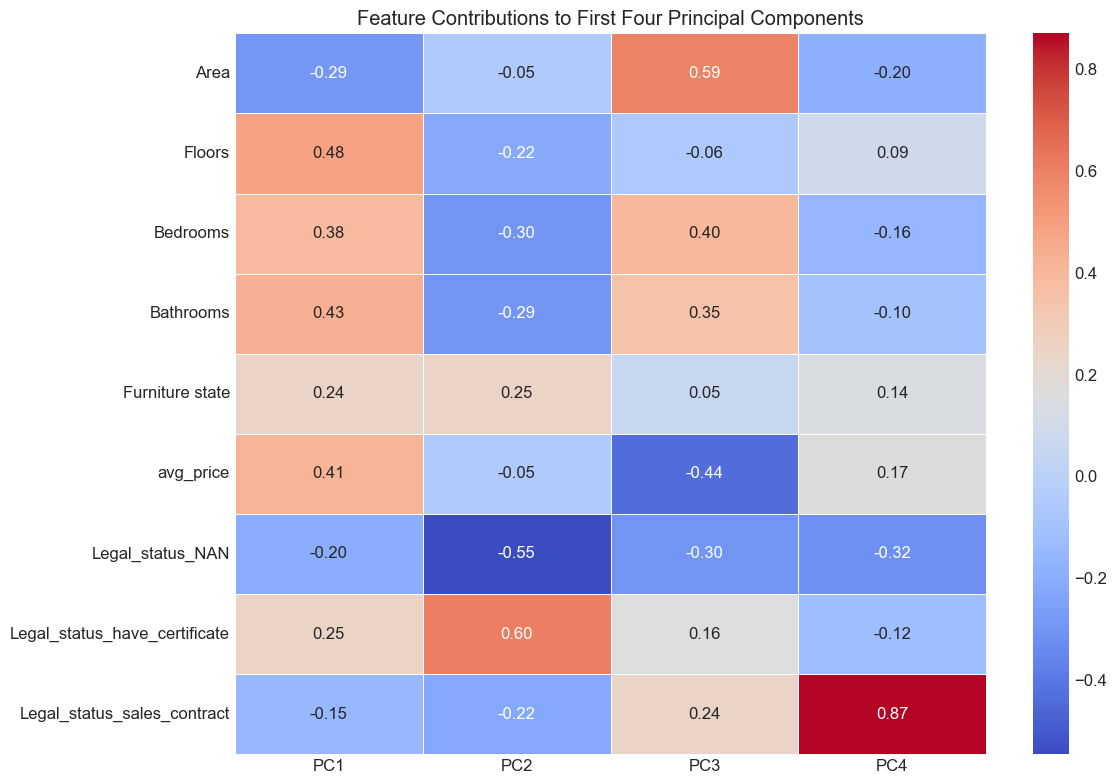

In [17]:
# Visualize feature contributions to first two PCs with heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    loadings.iloc[:, :4],  # Show first 4 PCs
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Feature Contributions to First Four Principal Components')
plt.tight_layout()
plt.show()

## Dimensionality Reduction

Based on our analysis of the explained variance, we can reduce the dimensions to a smaller number of components while preserving most of the information:

In [18]:
# Create a new PCA pipeline with optimal number of components
n_components = min(n_components_95, len(numerical_features))
optimal_pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components))
])

# Apply the pipeline to get reduced features
X_reduced = optimal_pca_pipeline.fit_transform(X)

# Convert to DataFrame
reduced_df = pd.DataFrame(
    data=X_reduced,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

print(f"Original data shape: {X.shape}")
print(f"Reduced data shape: {reduced_df.shape}")
reduced_df.head()

Original data shape: (24807, 9)
Reduced data shape: (24807, 7)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.474412,1.403481,-0.500426,0.260427,0.964721,-0.244174,-0.437022
1,0.138999,0.696599,0.903921,-0.236664,0.967623,-0.289695,-0.968066
2,0.781974,-0.518916,1.056891,-0.492031,-1.241829,-0.031187,1.273746
3,0.280633,-3.804629,-1.021876,-0.789831,1.063997,-0.185633,0.280178
4,2.109213,-1.253038,1.500066,-0.644802,-1.410801,-0.003007,0.068478


## PCA and Target Variable

Let's examine how our principal components relate to the target variable (Price):

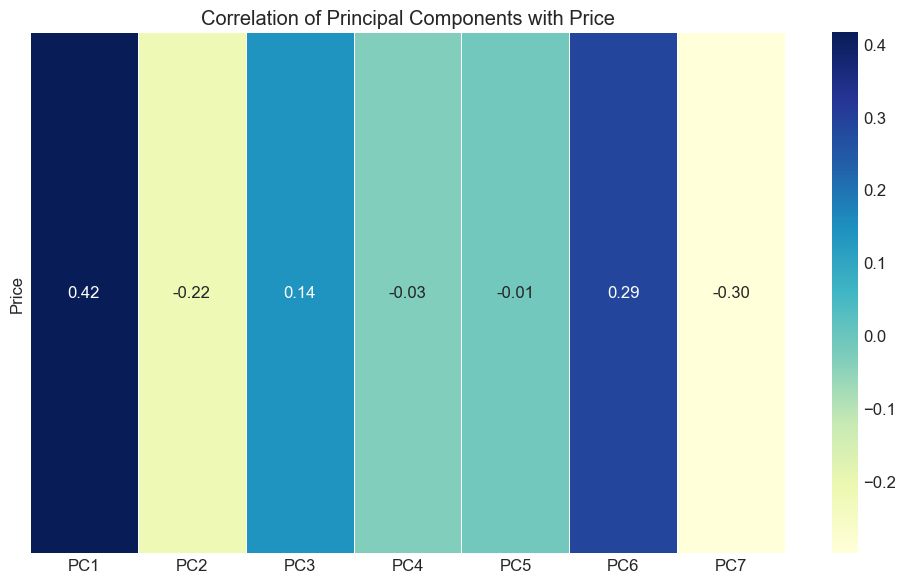

In [27]:
# Combine PCs with target variable
if 'Price' in df.columns:
    reduced_df['Price'] = df['Price']
    
    # Calculate correlation with price
    corr_with_price = reduced_df.corr()['Price'].sort_values(ascending=False)
    # show correlation values
    pc_correlations = corr_with_price.loc[[col for col in reduced_df.columns if col.startswith('PC')]]

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pd.DataFrame(pc_correlations).T,  # Transpose to make it horizontal
        annot=True,
        cmap='YlGnBu',
        fmt='.2f',
        linewidths=0.5
    )
    plt.title('Correlation of Principal Components with Price')
    plt.tight_layout()
    plt.show()


In [20]:
# Create 3D visualization of first 3 PCs if we have at least 3 components
if X_pca.shape[1] >= 3:
    fig = px.scatter_3d(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        z=X_pca[:, 2],
        color=df['Price'] if 'Price' in df.columns else None,
        opacity=0.7,
        title='PCA: First Three Principal Components',
        labels={
            'x': f'PC1 ({explained_variance[0]:.2%})',
            'y': f'PC2 ({explained_variance[1]:.2%})',
            'z': f'PC3 ({explained_variance[2]:.2%})'
        }
    )
    
    fig.update_layout(
        template='plotly_white',
        scene=dict(
            xaxis_title=f'PC1 ({explained_variance[0]:.2%})',
            yaxis_title=f'PC2 ({explained_variance[1]:.2%})',
            zaxis_title=f'PC3 ({explained_variance[2]:.2%})'
        ),
        width=900,
        height=700
    )
    
    fig.show()

In [28]:
# Export data with reduced features
reduced_df.to_csv('data_train_reduced.csv', index=False)
# Display completion message
print("PCA analysis completed and reduced data saved to 'data_train_reduced.csv'.")

PCA analysis completed and reduced data saved to 'data_train_reduced.csv'.


## Conclusion

In this notebook, we performed Principal Component Analysis on housing data to:

1. Reduce dimensionality while preserving most of the variance in the data
2. Visualize high-dimensional data in 2D and 3D plots
3. Identify which features contribute most to the principal components
4. Examine how principal components relate to the target variable (Price)

The insights gained from PCA can help us understand the underlying structure of the housing data and potentially improve predictive models by focusing on the most important features or using the reduced dimensions as input features.